In [121]:
### JUGANDO CON EL PREPROCESAMIENTO, LA TASA DE APRENDIZAJE Y EL NUMERO DE ITERACIONES CON EL MODELO CONSTRUIDO
### SE ALTERO EL ALGORITMO DE IMPLEMENTACION POR LA DESVIACION ESTANDAR APLICADA POR NUMPY
### SE CAMBIO LOS PARAMETROS INDICADOS (ALPHA E ITERACIONES)
### PARA LA NORMALIZACION DE DATOS, SE USO LA DESVIACION ESTANDAR DE NUMPY
### SE PROBO CON LO SIGUIENTE:
### ALPHA = 0.0002
### ITERACIONES = 500 000
_ALPHA = 0.0002
_ITERACIONES = 500000
### 
### NOTA: SE MOSTRARÁ AVANCES CADA "25 000" ITERACIONES, ESTO PARA AHORRAR TIEMPO DE PROCESAMIENTO MIENTRAS IMPRIME
### 

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])#---
    
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])#---
    
    classes = np.array(test_dataset["list_classes"][:])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))#---
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
#-------------------------------------------------------------------------------------------
def inicializar_zeros(dimension):
    w = np.zeros((dimension, 1),dtype='float')
    b = 0
    assert(w.shape == (dimension,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w ,b
#-------------------------------------------------------------------------------------------
def sigmoide(self):
    return 1 / (1 + np.exp(-self))
#-------------------------------------------------------------------------------------------
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoide(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)), axis = 1)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    return grads, cost
#-------------------------------------------------------------------------------------------
def optimizar(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 25000== 0:
            print ("Costo despues de iteracion %i: %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs
#-------------------------------------------------------------------------------------------
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoide(np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        if (A[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape == (1, m))
    return Y_prediction
#-------------------------------------------------------------------------------------------
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =False):
    w, b = inicializar_zeros(X_train.shape[0])
    parameters, grads, costs = optimizar(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train, "w" : w, "b" : b,
    "learning_rate" : learning_rate, "num_iterations": num_iterations}
    return d

In [123]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x_orig_flatten = train_set_x_orig.reshape (train_set_x_orig.shape [0], -1).T
test_set_x_orig_flatten = test_set_x_orig.reshape (test_set_x_orig.shape [0], -1).T

### DESVIACION ESTANDAR PARA train_set_x ###
train_set_x_anterior = train_set_x_orig_flatten/255
print("-------------------------------------")
desviacion_estandar = np.std(train_set_x_orig_flatten, ddof=1)
filas = len(train_set_x_orig_flatten)
colum = len(train_set_x_orig_flatten[0])
train_set_x = np.zeros((filas, colum))
for i in range (filas):
    train_set_x[i] = np.matrix(train_set_x_orig_flatten[i])/desviacion_estandar
print (train_set_x)

### DESVIACION STANDAR PARA test_set_x ###
test_set_x_anterior = test_set_x_orig_flatten/255
desviacion_estandar = np.std(test_set_x_orig_flatten, ddof=1)
filas = len(test_set_x_orig_flatten)
colum = len(test_set_x_orig_flatten[0])
test_set_x = np.zeros((filas, colum))
for i in range (filas):
    test_set_x[i] = np.matrix(test_set_x_orig_flatten[i])/desviacion_estandar
print (train_set_x)

-------------------------------------
[[0.25326382 2.91998284 1.22162548 ... 2.13039565 0.32775318 0.11918297]
 [0.46183402 2.86039136 1.05774889 ... 2.30917011 0.35754892 0.41714041]
 [0.83428081 2.83059561 1.01305527 ... 2.45814882 0.34265105 0.7895872 ]
 ...
 [0.         1.22162548 2.05590629 ... 1.26631909 0.05959149 0.        ]
 [0.         1.19182973 2.1005999  ... 1.59407227 0.07448936 0.        ]
 [0.         1.2067276  2.11549777 ... 2.21978288 0.         0.        ]]
[[0.25326382 2.91998284 1.22162548 ... 2.13039565 0.32775318 0.11918297]
 [0.46183402 2.86039136 1.05774889 ... 2.30917011 0.35754892 0.41714041]
 [0.83428081 2.83059561 1.01305527 ... 2.45814882 0.34265105 0.7895872 ]
 ...
 [0.         1.22162548 2.05590629 ... 1.26631909 0.05959149 0.        ]
 [0.         1.19182973 2.1005999  ... 1.59407227 0.07448936 0.        ]
 [0.         1.2067276  2.11549777 ... 2.21978288 0.         0.        ]]


In [124]:
### COMPARACION DESVIACION ESTANDAR --- CON --- LA DIVISION /255
print ("\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PARA train_set_x %%%%%%%%%%%%%%%%%%%%%%%%%%\n")
print ("\ndivision /255\n")
print (train_set_x_anterior)
print ("\ndesviacion estandar\n")
print (train_set_x)
print ("\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PARA test_set_x %%%%%%%%%%%%%%%%%%%%%%%%%%\n")
print ("\ndivision /255\n")
print (test_set_x_anterior)
print ("\ndesviacion estandar\n")
print (test_set_x)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PARA train_set_x %%%%%%%%%%%%%%%%%%%%%%%%%%


division /255

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]

desviacion estandar

[[0.25326382 2.91998284 1.22162548 ... 2.13039565 0.32775318 0.11918297]
 [0.46183402 2.86039136 1.05774889 ... 2.30917011 0.35754892 0.41714041]
 [0.83428081 2.83059561 1.01305527 ... 2.45814882 0.34265105 0.7895872 ]
 ...
 [0.         1.22162548 2.05590629 ... 1.26631909 0.05959149 0.        ]
 [0.         1.19182973 2.1005999  ... 1.59407227 0.07448936 0.        ]
 [0.         1.2067276  2.11549777 ... 2.21978288 0.         0.     

In [125]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, _ITERACIONES, _ALPHA ,print_cost = True)

Costo despues de iteracion 0: 0.693147
Costo despues de iteracion 25000: 0.022298
Costo despues de iteracion 50000: 0.011029
Costo despues de iteracion 75000: 0.007297
Costo despues de iteracion 100000: 0.005446
Costo despues de iteracion 125000: 0.004342
Costo despues de iteracion 150000: 0.003609
Costo despues de iteracion 175000: 0.003087
Costo despues de iteracion 200000: 0.002697
Costo despues de iteracion 225000: 0.002394
Costo despues de iteracion 250000: 0.002152
Costo despues de iteracion 275000: 0.001955
Costo despues de iteracion 300000: 0.001790
Costo despues de iteracion 325000: 0.001652
Costo despues de iteracion 350000: 0.001533
Costo despues de iteracion 375000: 0.001430
Costo despues de iteracion 400000: 0.001340
Costo despues de iteracion 425000: 0.001260
Costo despues de iteracion 450000: 0.001190
Costo despues de iteracion 475000: 0.001127
train accuracy: 100.0 %
test accuracy: 72.0 %


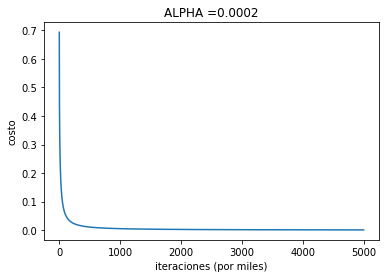

In [126]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('iteraciones (por miles)')
plt.title("ALPHA =" + str(d["learning_rate"]))
plt.show()

- >Para una tasa de aprendizaje: 0.01


C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


train accuracy: 100.0 %
test accuracy: 70.0 %
- >Para una tasa de aprendizaje: 0.001
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
- >Para una tasa de aprendizaje: 0.0002
train accuracy: 96.17224880382776 %
test accuracy: 74.0 %

-------------------------------------------------------



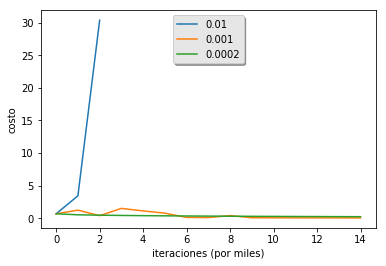

In [127]:
learning_rates = [0.01, 0.001,_ALPHA]
models = {}
for i in learning_rates:
    print ("- >Para una tasa de aprendizaje: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('costo')
plt.xlabel('iteraciones (por miles)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 0.0, prediccion de algoritmo = "non-cat" imagen


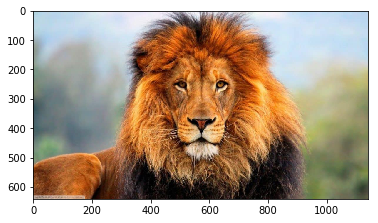

In [128]:
### probar con tu imagen
my_image = "leon1.jpg"
fname = "prueba_gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
#image = np.array(Image.fromarray(fname).resize(), flatten=False)
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", prediccion de algoritmo = \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" imagen")

C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 1.0, prediccion de algoritmo = "cat" imagen


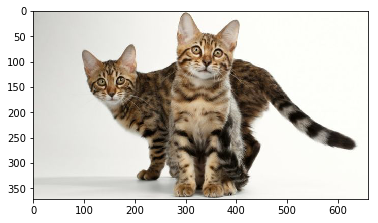

In [131]:
### probar con tu imagen
my_image = "gatos1.jpg"
fname = "prueba_gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
#image = np.array(Image.fromarray(fname).resize(), flatten=False)
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", prediccion de algoritmo = \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" imagen")

C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 1.0, prediccion de algoritmo = "cat" imagen


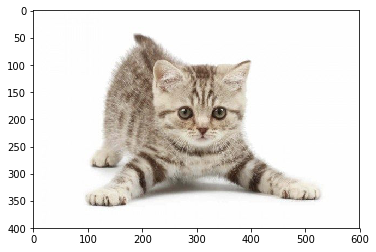

In [137]:
### probar con tu imagen
my_image = "gato3.jpg"
fname = "prueba_gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
#image = np.array(Image.fromarray(fname).resize(), flatten=False)
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", prediccion de algoritmo = \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" imagen")

In [138]:
### desviacion standar
a = ([3,6,9],[12,15,18],[21,24,27])
print (a)
print (" ---- ---- ----")
print (np.matrix(a))
print (" ---- ---- ----")
asd = np.std(a, ddof=1)
print ("desviacion estandar",asd)
print (np.matrix(a[0])/3.)

([3, 6, 9], [12, 15, 18], [21, 24, 27])
 ---- ---- ----
[[ 3  6  9]
 [12 15 18]
 [21 24 27]]
 ---- ---- ----
desviacion estandar 8.215838362577491
[[1. 2. 3.]]
